<a href="https://colab.research.google.com/github/sazio/Transients/blob/master/Python/WLC_SSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [132]:
# Simulation's Parameters 
N_s = 576 # x_i with i in [1,...,N_s]
N_p = 3 # a_i with i in [1,...,N_p]
alpha = 1 #learning phase
beta = 2.5
V_1 = 0.9
eps = 0.01
sigma = 0.0001
tau = 1 # delay in competition matrix
V_0 = 2.

In [133]:
t = np.linspace(0, 15, num = 7500) # time steps 
# adding some noise to principal neurons initialization
#a = np.asarray([np.ones(N_p) + np.random.normal(0,0.001, N_p) for i in range(0,len(t))]) # principal neurons 
a = np.asarray([np.zeros(N_p) for i in range(0,len(t))]) # principal neurons 

In [134]:
# Generating binary patterns 
# np.random.seed(137)

# patterns = [np.random.randint(0,2,N_s) for i in range(num_patterns)]

In [135]:
patterns = []

pattern_1 = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0]

pattern_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

pattern_3 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


patterns.append(np.asarray(pattern_1))
patterns.append(np.asarray(pattern_2))
patterns.append(np.asarray(pattern_3))
num_patterns = len(patterns)
repetitions = 5

In [136]:
time_each_pattern = len(t)//(num_patterns*repetitions)
print(time_each_pattern)

500


In [137]:
x_0 = np.asarray([patterns[0] for i in range(0,time_each_pattern)]) # sensory neurons -- pattern 1 
x_1 = np.asarray([patterns[1] for i in range(time_each_pattern, 2*time_each_pattern)]) # sensory neurons -- pattern 2
x_2 = np.asarray([patterns[2] for i in range(2*time_each_pattern, 3*time_each_pattern)]) # sensory neurons -- pattern 3

x = np.vstack((x_0,x_1,x_2,x_0,x_1,x_2, x_0,x_1,x_2,x_0,x_1,x_2,x_0,x_1,x_2)) # sensory neurons -- all the patterns

In [138]:
x.shape[0] == len(t)

True

In [139]:
np.random.seed(137) # setting random seed  
eta = np.random.normal(0,0.0001, (N_s,N_p)) # small perturbations for initial state
P = np.asarray([np.ones((N_s,N_p)) + eta  for i in range(0,len(t))]) # projection matrix
V = np.asarray([ V_0*np.ones((N_p, N_p)) - (V_0 - 1)*np.eye(N_p) for i in range(0, len(t))]) # competition matrix 
xi_t = np.random.uniform(0, sigma, size=len(t)) # adding noise uniformly sampled [0,sigma]

In [127]:
def ODE_Int(a,x,t,P,V,xi_t,alpha = 1, tau = 1):
  """
  Euler Method for ODE Integration 
  """

  for n in tqdm(range(0,len(t)-1)):
    for i in range(0, N_p):
      #Principal Neurons Amplitudes
      a[n+1,i] = a[n,i] + (a[n,i] -a[n,i]*np.matmul(V[n, i,:],a[n,:]) + alpha*a[n,i]*np.matmul(P[n,:,:].T[i,:], x[n,:]) + xi_t[n])*(t[n+1] - t[n]) 
          
      for j in range(0, N_s):
        for k in range(0, N_p):
          # Projection Matrix
          P[n+1, j, k] = P[n, j, k] + eps*a[n, k]*(beta*x[n, j] - P[n,j,k])*(t[n+1] - t[n])
          for l in range(0,N_p):
            # Competition Matrix - Delay Differential Equation 
            if n-tau >= 0: 
              V[n+1,l, k] = V[n, l, k] + eps*a[n, l]*a[n-tau,k]*(V_1 - V[n, l, k])*(t[n+1] - t[n])
              V[n+1,l,l] = 1 
            else:
              V[n+1, l, k] = V[n, l, k] #+ eps*a[n, i]*a[n, k]*(V_1 - V[n, i, k])*(t[n+1] - t[n])
              V[n+1,l,l] = 1 

  return (a, P, V)

In [128]:
a_learn, P_learn, V_learn = ODE_Int(a,x,t,P,V,xi_t,alpha = 1, tau = 5)

In [ ]:
#t_test = np.linspace(0, 3, num = 1200)
#xi_t_test = np.random.uniform(0, sigma, size=len(t_test))

In [99]:
#a_retr, P_retr, V_retr = ODE_Int(a_learn, x, t, P_learn, V_learn, xi_t, alpha = 0)

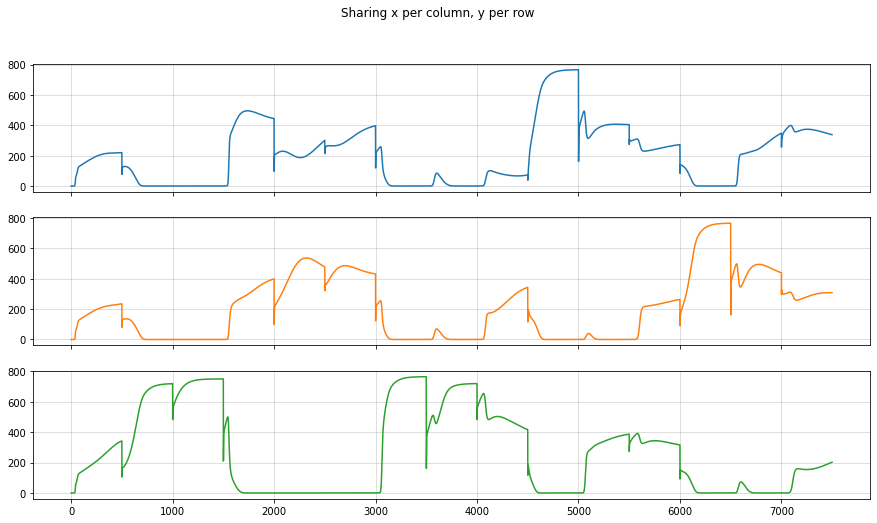

In [130]:
# Plotting learning phase
fig, ((ax1, ax2, ax3)) = plt.subplots(3, figsize = (15,8))
fig.suptitle('Sharing x per column, y per row')
ax1.plot(a_learn[:,0])
ax1.grid(alpha = 0.5)
ax2.plot(a_learn[:,1], 'tab:orange')
ax2.grid(alpha = 0.5)
ax3.plot(a_learn[:,2], 'tab:green')
ax3.grid(alpha = 0.5)

for ax in fig.get_axes():
    ax.label_outer()

In [129]:
# Plotting - retrieval phase
"""
fig, ((ax1, ax2, ax3)) = plt.subplots(3, figsize = (15,8))
fig.suptitle('Sharing x per column, y per row')
ax1.plot(a_retr[:,0])
ax1.grid(alpha = 0.5)
ax2.plot(a_retr[:,1], 'tab:orange')
ax2.grid(alpha = 0.5)
ax3.plot(a_retr[:,2], 'tab:green')
ax3.grid(alpha = 0.5)

for ax in fig.get_axes():
    ax.label_outer()

""";